# Question 10.1

Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can using 
(a) a regression tree model, and 
(b) a random forest model.  
In R, you can use the tree package or the rpart package, and the randomForest package.  
For each model, describe one or two qualitative takeaways you get from analyzing the results (i.e., don’t just stop when you have a good model, but interpret it too).

In [262]:
# Clear environment

rm(list = ls())

In [280]:
##########LIBRARY##########
library(tidyr) # to use tibble function
library(DAAG)
library(tree) #to create regression tree using tree package
#library("ggplot2")
#install.packages("devtools")
#install.packages("corrplot")
#library("devtools")
#library("corrplot") # to use Correlation plot
#library(plyr) #to use arrange function

In [265]:
##########INGEST FILE##########

#crime<- read.table("C:\\Preethi\\R\\USCrimes.txt",header=TRUE,stringsAsFactors = FALSE,sep="\t")
#head(data,10)
#colClasses = c("numeric", "numeric", "numeric")
#colClasses
data = read.table("C:\\Preethi\\R\\USCrimes.txt",header=TRUE,stringsAsFactors = FALSE,sep="\t") 
#%>% as_tibble()
head(data,2)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635


# Question 10.1 a # Regression Tree
## Approach taken
1.fit a regression tree.Studying the  what predictors and splits are used in the regression tree will show 
*that only 4 variables  Po1,Pop, LF and NW are used for Tree split  
*logic/value used to split is present in $frame parameter of the model.
*Deviance = 47390
*Number of terminal nodes =7
2.plot to see the tree structure visually see the splits and predictors used for the split
3. PRUNING:  
-Limit the Terminal nodes to 4 and visualize the  Deviance ( quality-of-fit statistic) 
vs. the number of terminal nodes of the tree. 
-When I changed the terminal nodes count, the best visualiation on deviance 
is obtained with 4 and hence retained the same
4. Interpret the model
-Obtain the Sum of square error and residual for predicted vs. actual values along with the model' R sqaured value(72%)
-for multiple values of Terminal nodes (from 1-7), obtain the residual error to understand the model with lowest errors.
Finally use cross validation to compare the residual errors of the cross validated model
#TAKEAWAYS
# These errors are larger with cross validated model
# indicating that the model does not do well with Cross validation; 
# it's just way overfit with original data

In [266]:
# Fit a regression tree function to the crime data
tree.data <- tree(Crime~., data = data)
summary(tree.data)
#Only 4 variables Po1,Pop, LF and NW are used in regression tress
#Deviance = 47390
#Number of terminal nodes =7


Regression tree:
tree(formula = Crime ~ ., data = data)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

In [17]:
# More information about the way the tree was split
#Only 4 variables Po1,Pop, LF and NW have split amount (Tree splits are based on these variables)
tree.data$frame

,var,n,dev,yval,splits
,<fct>,<dbl>,<dbl>,<dbl>,"<chr[,2]>"
1,Po1,47,6880927.66,905.0851,"<7.65 , >7.65"
2,Pop,23,779243.48,669.6087,"<22.5 , >22.5"
4,LF,12,243811.00,550.5000,"<0.5675, >0.5675"
8,<leaf>,7,48518.86,466.8571,","
9,<leaf>,5,77757.20,667.6000,","
5,<leaf>,11,179470.73,799.5455,","
3,NW,24,3604162.50,1130.7500,"<7.65 , >7.65"
6,Pop,10,557574.90,886.9000,"<21.5 , >21.5"
12,<leaf>,5,146390.80,1049.2000,","


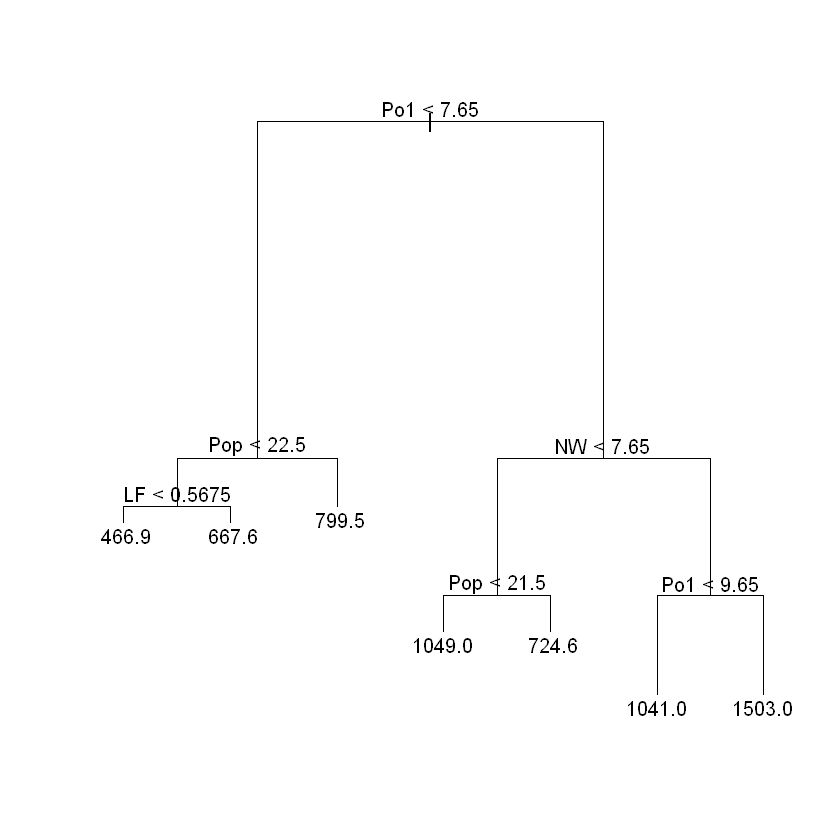

In [15]:
# Plot the regression tree

plot(tree.data)
text(tree.data)

# Determine if pruning the tree will improve performance through cross-validation

In [ ]:
#How?
# by looking at the deviance of trees with different number of terminal nodes.
# Deviance is a quality-of-fit statistic.
# The x-axis represents the number of terminal nodes.

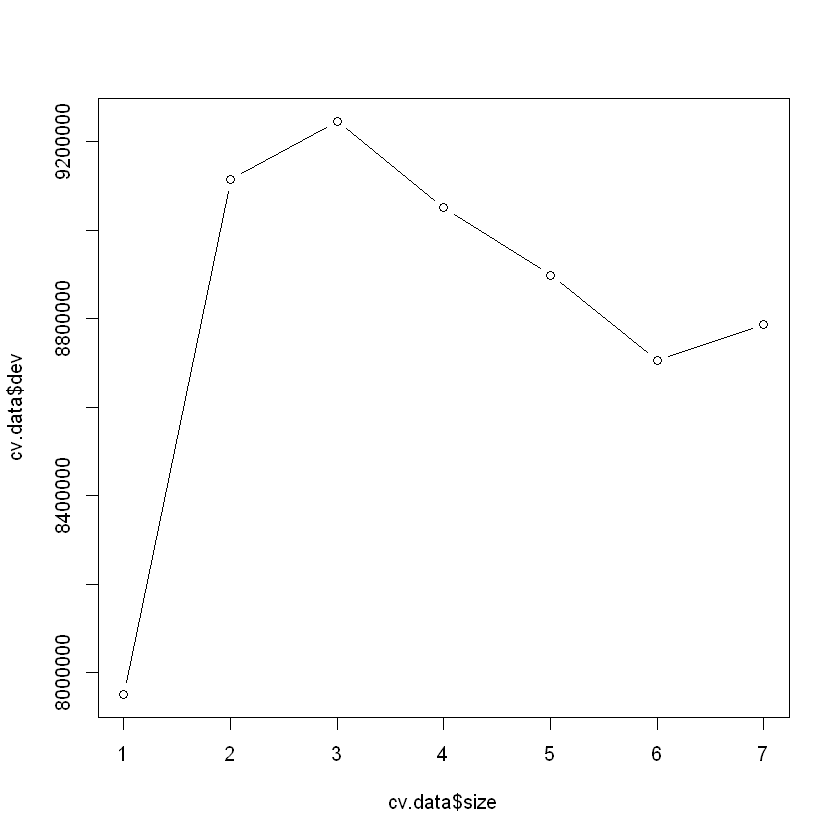

In [271]:
#x-axis is # of terminal nodes(from tree viz above,it is 7)
cv.data <- cv.tree(tree.data)
plot(cv.data$size, cv.data$dev, type = "b")

In [19]:
# This plot suggests that we get the best fit using all of the terminal nodes in the
# tree that we already plotted.
# prune the tree by limiting the number of terminal nodes of the tree if this
# is desired. This is just one example of how you can prune a regression tree.

In [276]:
termnodes <- 4 # Change this parameter to determine the leaf nodes
prune.data <- prune.tree(tree.data, best = termnodes)

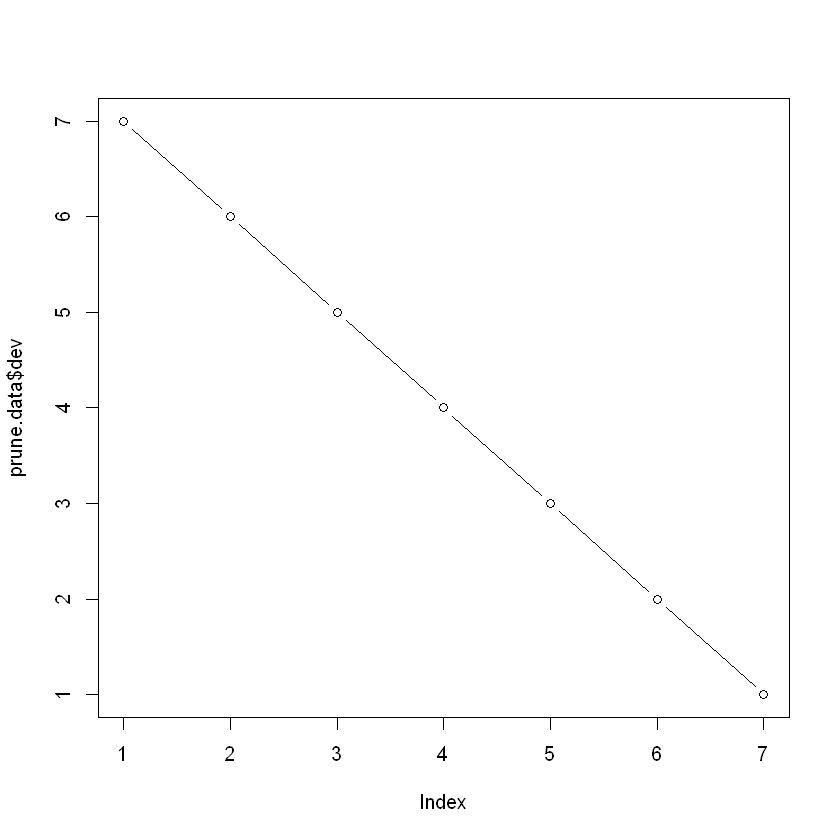

In [277]:
#Plot the pruned tree' deviation
plot(cv.data$size, prune.data$dev, type = "b")

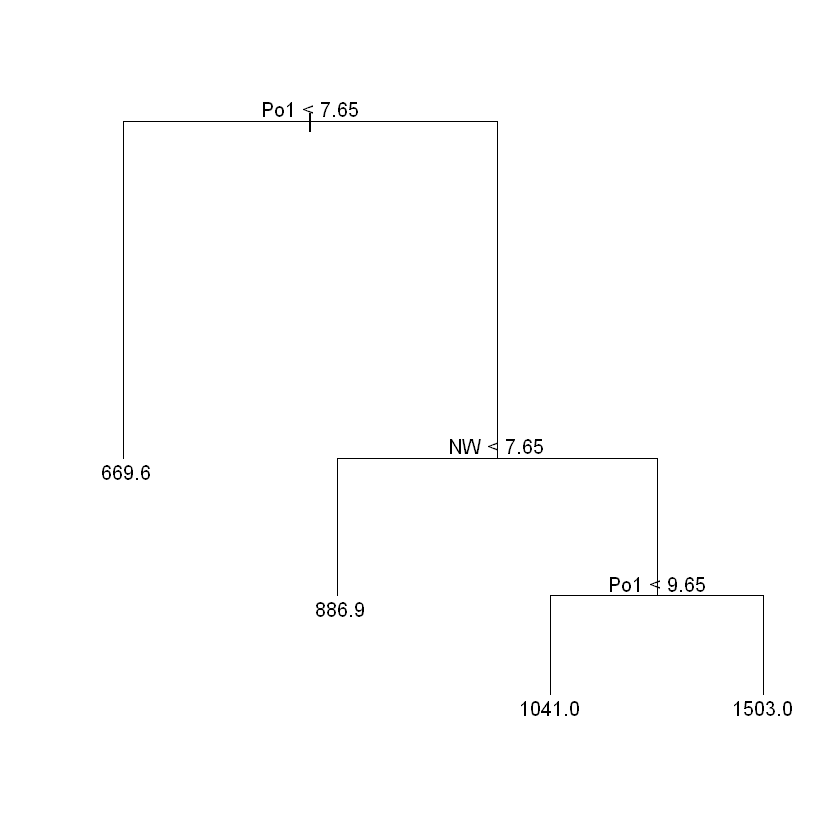

In [26]:
# Plot the pruned tree
plot(prune.data)
text(prune.data)

# Analysis#1  (Total variation in the dependent variable)

In [29]:
#Decision: use unpruned regression model?
# Calculate SSres of the unpruned regression model.

yhat <- predict(tree.data)
SSres <- sum((yhat-data$Crime)^2)
SSres 

[1] 1895722

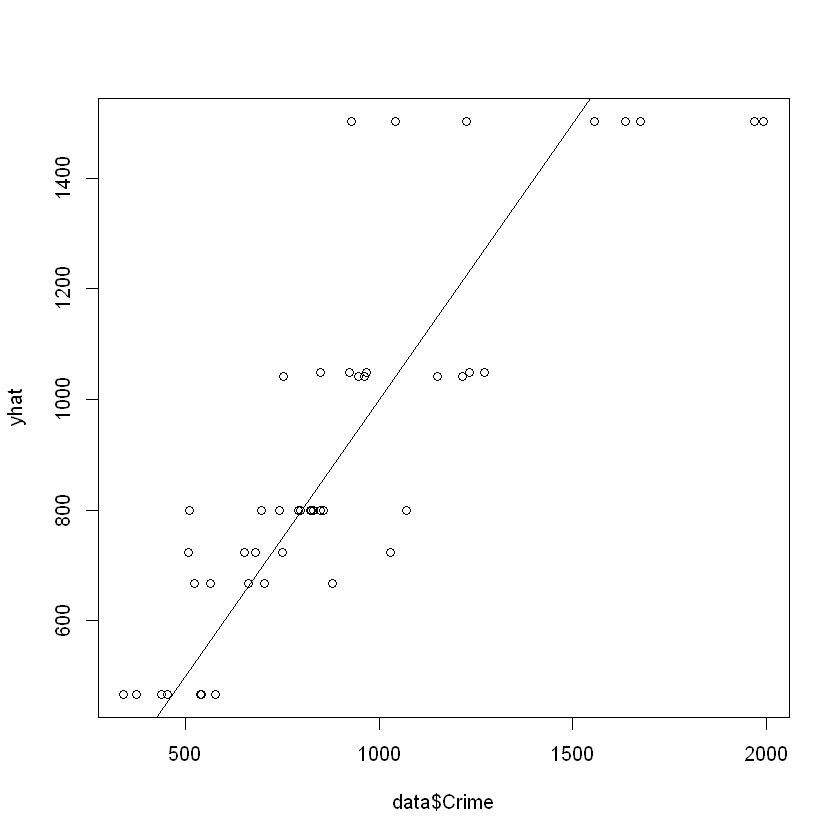

In [30]:
# Plot of actual vs. predicted crime values

plot(data$Crime, yhat)
abline(0,1)

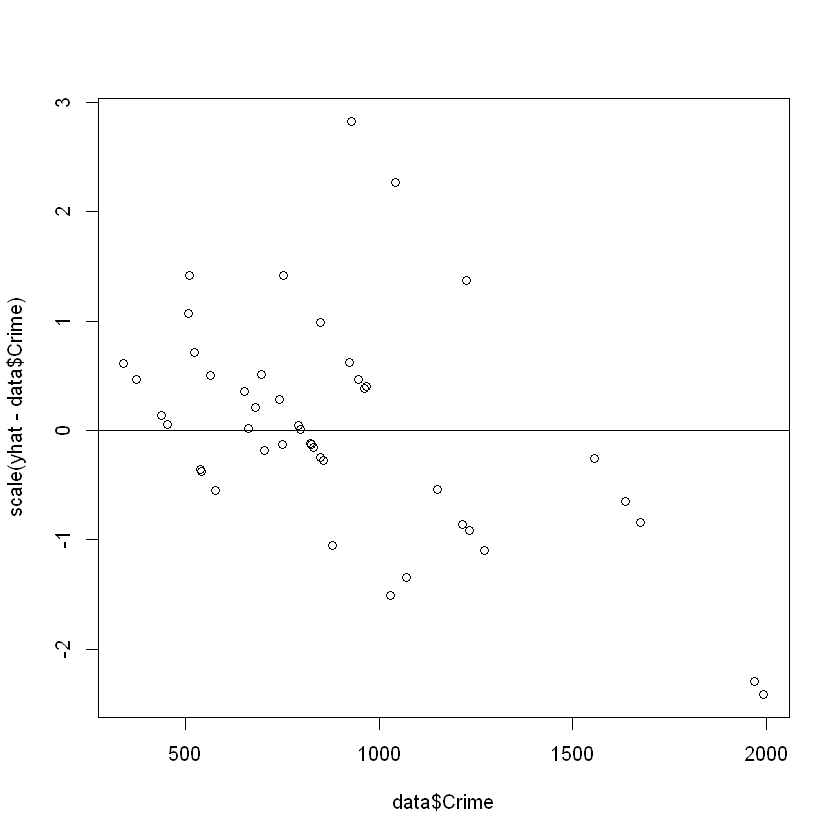

In [31]:
# Plot the residuals

plot(data$Crime, scale(yhat - data$Crime))
abline(0,0)

In [35]:
prune.tree(tree.data)$size
prune.tree(tree.data)$dev
#below shows all terminal nodes and the residual errors with each of the nodes

[1] 7 6 5 4 3 2 1

[1] 1895722 2013257 2276670 2632631 3364043 4383406 6880928

In [36]:
# Now, compare with the sum of squared errors in cross-validation:

cv.data <- cv.tree(tree.data) # cross-validation
cv.data$size
cv.data$dev

[1] 7 6 5 4 3 2 1

[1] 8919914 8896137 8853787 8916545 8127298 7539145 8565825

In [ ]:
#RESULTS
# These errors are larger
# indicating that the model does not do well with Cross validation; 
# it's just way overfit with original data

# Analysis#2  (R2 value)

In [32]:
#Quality of the Regression model
#Calculate SStot and R-squared of this model on the training data

SStot <- sum((data$Crime - mean(data$Crime))^2)
R2 <- 1 - SSres/SStot
R2
#R2 is 0.72 showing the model fit is good

[1] 0.7244962

# Question 10.1 # Random Forest ##Approach Taken
1) Use randomforest libary to create a model. 
I have setup number of splits as 4 based on regression trees optimal split
#mtry:Number of variables available for splitting at each tree node.
It generates a forest with 500 tress and mean square error of 82187
2) Fit the model and compare the fit with the actual data points.
3) calculate the sum of square residual and plot the residuals
4) Random trees R2 value is 0.43 vs. 0.72 Regression trees
5) Also , the Residual error is far less than the regression tree (as noted in the lectures)


In [43]:
#LIBRARIES
#install.packages("randomForest")
library(randomForest)

In [45]:
numpred <- 4
rf.data <- randomForest(Crime~., data = data, mtry = numpred, importance = TRUE)
rf.data


Call:
 randomForest(formula = Crime ~ ., data = data, mtry = numpred,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 82187.74
                    % Var explained: 43.86

In [ ]:
#Above shows 500 trees and mean square error is 82187

# Random Forest Model' quality

In [47]:
# Calculate SSres of the random forest model

yhat.rf <- predict(rf.data)
SSres <- sum((yhat.rf-data$Crime)^2)
SSres

[1] 3862824

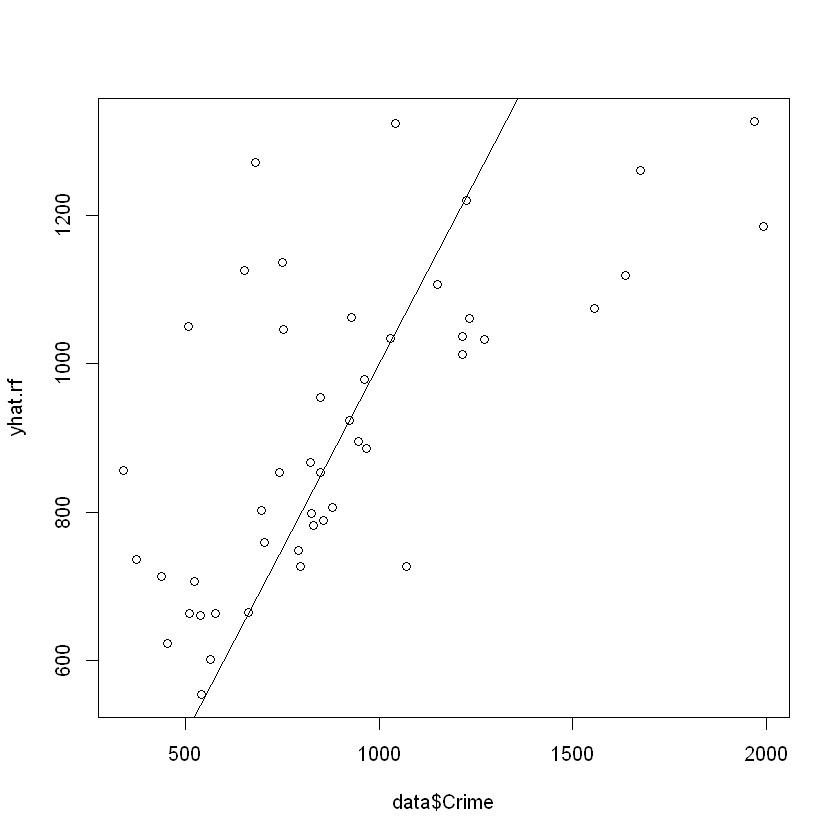

In [49]:
# Plot of actual vs. predicted crime values

plot(data$Crime, yhat.rf)
abline(0,1)

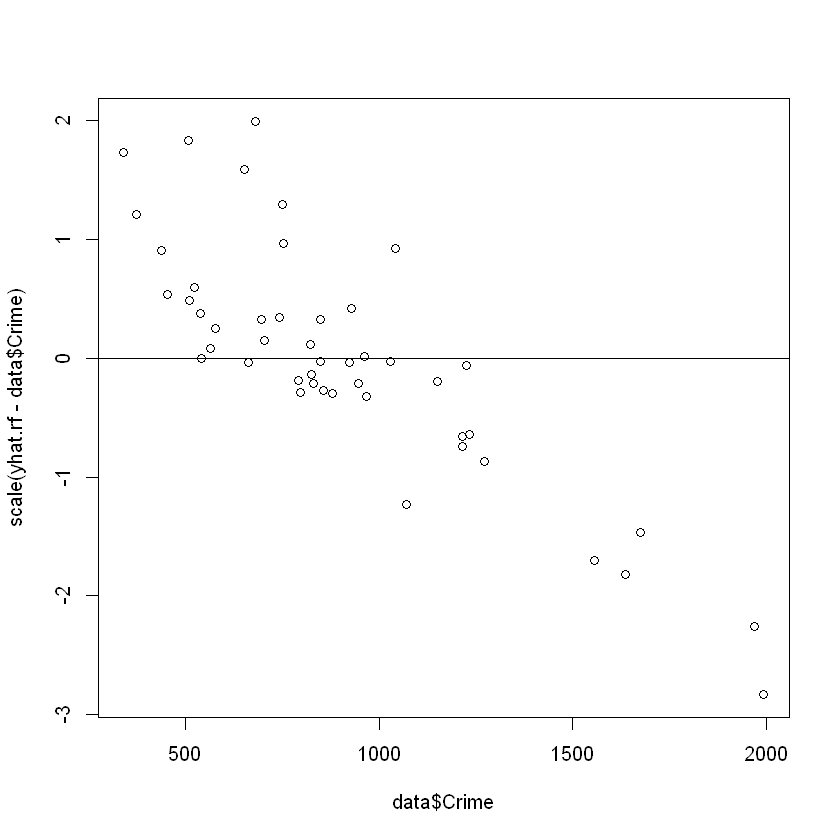

In [50]:
# Plot residuals

plot(data$Crime, scale(yhat.rf - data$Crime))
abline(0,0)


# Analysis and Intepreting the Random forest trees

In [59]:
# Calculate SStot and R-squared of this model

SStot <- sum((data$Crime - mean(data$Crime))^2)
R2 <- 1 - SSres/SStot
R2
#Model quality of random is 0.43 vs. 0.72 Regression trees

[1] 0.4386188

In [60]:
# leave-one-out cross-validation on Random forest

SSE <- 0

for (i in 1:nrow(data)) {
  rd <- randomForest(Crime~., data = data[-i,], mtry = numpred, importance = TRUE)
  SSE = SSE + (predict(rd,newdata=data[i,]) - data[i,16])^2
}
1 - SSE/SStot
#Residual error(The error is much better than the regression tree)

1 
0.4355374

In [55]:
#This model seems to take the best of the process just like in the lectures

In [57]:
importance(rf.data)

,%IncMSE,IncNodePurity
M,1.00434273,199324.76
So,3.32835988,30718.92
Ed,2.77855877,208227.61
Po1,10.29965085,1174840.68
Po2,10.72770654,941376.07
LF,2.27372307,287574.89
M.F,2.51930528,282323.77
Pop,2.43114058,340008.58
NW,8.03090795,569033.69
U1,-0.09193546,141520.89


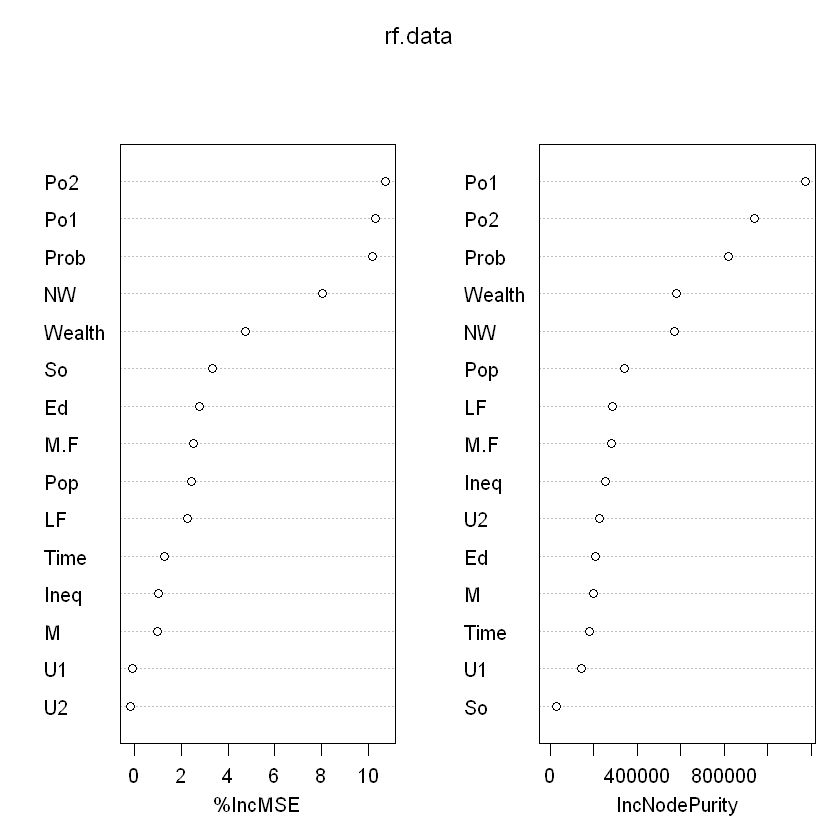

In [58]:
# Plots of these importance measures

varImpPlot(rf.data)

# Question 10.2
Describe a situation or problem from your job, everyday life, current events, etc., 
for which a logistic regression model would be appropriate. 
List some (up to 5) predictors that you might use.

# Question 10.3(a)
##Input:
1.	Using the GermanCredit data set germancredit.txt 
from http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german / 
(description at http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29 ), 
##Ask:
use logistic regression to find a good predictive model for whether credit applicants are good credit risks or not.  
Show your model (factors used and their coefficients), the software output, and the quality of fit. 
##Ideas:
You can use the glm function in R. 
To get a logistic regression (logit) model on data where the response is either zero or one, 
use family=binomial(link=”logit”) in your glm function call.

# Approach for Logistic Regression
##PART#!

1) Since binomial family of glm recognises 0 and 1 as the classfication values, I converted the 1s and 2s to 0 and 1 for response variable(y)
2) Using validation split the data into trainind and validation set
3)Using glm and logit (logistic regression), fit a model. AIC is 713 for this model using all predictors
Input Transformation:
4) 2nd iteration=>fit the model only using categorical predictors.
#AIC is 734(high) vs.701 using all predictorsfit the model only using categorical predictors.
5) 3rd iteration=>fit the model only using SIGNIFICANT categorical predictors.
#This model has a lower AIC of 98(when run for first time), the second time shows 701 (when re-run) vs. 734 with all predictors shows the model' fit
Response Transformation:
6)In addition to binary conversion of response, the predictors used in the 3rd iteration are converted to 0 and 1 classification value as not all values of the categorical predictors are significant
7) Predict the model and created a confusion matrix vs. the validation set.
8)Accuracy of the model is 74% (# Model's accuracy is (170 + 43) / (170 + 53 + 43 + 34) = 74%.) and specificity if 84%
9)Using proc library, plotted the ROC curve with area under the curve(AUC) = 69%. 
This means that whenever a sample is chosen from the response group 
and another sample is chosen from the non-response group, then 
the model will correctly classify both the samples 68% of the times!

In [228]:
# Set the seed to produce reproducible results as random sampling is done in 
#the next step

set.seed(1)
rm(list = ls())

In [279]:
#LIbRARY
library(pROC) #ROC graph

In [281]:
##########INGEST FILE##########

data = read.table("C:\\Preethi\\R\\german.data",header=TRUE,stringsAsFactors = FALSE,sep=" ") %>% as_tibble()
head(data,3)

A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,...,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [282]:
# Since binomial family of glm recognises 0 and 1 as the classfication values, 
# convert 1s and 2s to 0s and 1s for the response variable

data$X1.1[data$X1.1==1]<- 0
data$X1.1[data$X1.1==2]<- 1
#data$X1.1==2

In [283]:
# Divide the data into 70% training and 30% test/validation data

m <- nrow(data)
#sample(1:m, size = round(m*0.7), replace = FALSE)
trn <- sample(1:m, size = round(m*0.7), replace = FALSE)
d.learn <- data[trn,]
d.valid <- data[-trn,]
head(d.learn,2)
head(d.valid,2)

A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,...,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
A14,24,A34,A46,1927,A65,A73,3,A92,A101,...,A123,33,A143,A152,2,A173,1,A192,A201,0
A14,24,A32,A41,9277,A65,A73,2,A91,A101,...,A124,48,A143,A153,1,A173,1,A192,A201,0


A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,...,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0


In [235]:
head(d.learn,2)

A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,...,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
A14,12,A32,A43,886,A65,A73,4,A92,A101,...,A123,21,A143,A152,1,A173,1,A191,A201,0
A14,18,A32,A43,1453,A61,A72,3,A92,A101,...,A121,26,A143,A152,1,A173,1,A191,A201,0


In [284]:
# Develop the logistic regression model
# 1st iteration: Use all the available variables

reg = glm(X1.1 ~.,family=binomial(link = "logit"),data=d.learn)
summary(reg)
#AIC is 701 for this model using all predictors


Call:
glm(formula = X1.1 ~ ., family = binomial(link = "logit"), data = d.learn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4552  -0.6884  -0.3540   0.6043   2.5817  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.036e-01  1.344e+00  -0.449 0.653269    
A11A12      -3.439e-01  2.745e-01  -1.253 0.210360    
A11A13      -9.660e-01  4.731e-01  -2.042 0.041154 *  
A11A14      -1.722e+00  2.870e-01  -5.999 1.98e-09 ***
X6           2.277e-02  1.139e-02   1.999 0.045632 *  
A34A31       2.201e-02  6.894e-01   0.032 0.974528    
A34A32      -7.375e-01  5.441e-01  -1.356 0.175229    
A34A33      -1.143e+00  5.978e-01  -1.913 0.055768 .  
A34A34      -1.990e+00  5.600e-01  -3.554 0.000380 ***
A43A41      -1.639e+00  4.431e-01  -3.700 0.000216 ***
A43A410     -1.786e+01  5.754e+02  -0.031 0.975240    
A43A42      -7.737e-01  3.164e-01  -2.446 0.014460 *  
A43A43      -1.122e+00  3.121e-01  -3.594 0.000326 ***
A43A44      -1.484e

In [285]:
# 2nd iteration: Use all the variables found significant in 
# the 1st iteration.
# For categorical variables, if any value is significant,
# we'll keep all values in the model.

reg2 = glm(X1.1 ~ A11+A34+A43+A65+A75+A93+A101+A121+A143+A152+A173+A192,family=binomial(link = "logit"),data=d.learn)
summary(reg2)
#AIC is 734(high) vs.701 using al predictors


Call:
glm(formula = X1.1 ~ A11 + A34 + A43 + A65 + A75 + A93 + A101 + 
    A121 + A143 + A152 + A173 + A192, family = binomial(link = "logit"), 
    data = d.learn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0605  -0.7468  -0.4310   0.7383   2.5258  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7787     1.0370   1.715 0.086304 .  
A11A12       -0.3092     0.2567  -1.205 0.228353    
A11A13       -1.2994     0.4495  -2.891 0.003843 ** 
A11A14       -1.6608     0.2703  -6.144 8.06e-10 ***
A34A31       -0.4046     0.6426  -0.630 0.528894    
A34A32       -1.1712     0.4948  -2.367 0.017922 *  
A34A33       -1.1464     0.5671  -2.022 0.043215 *  
A34A34       -1.9976     0.5258  -3.799 0.000145 ***
A43A41       -1.2852     0.4129  -3.113 0.001855 ** 
A43A410     -16.1155   665.6749  -0.024 0.980686    
A43A42       -0.6501     0.2947  -2.206 0.027355 *  
A43A43       -0.8773     0.2906  -3.019 0.002540 ** 
A43A44       -1.

In [286]:
# 3rd iteration: Use all the variables found significant in 
# the 1st iteration.
# For categorical variables, if any value is significant,
# we'll keep all values in the model.
#Of these A11,A34,A43,A65,A121,A143 are significant
reg2 = glm(X1.1 ~ A11+A34+A43+A65+A121+A143 ,family=binomial(link = "logit"),data=d.learn)
summary(reg)
# This model has a lower AIC of 98 (704 second time) vs. 753 with all predictors shows the model' fit


Call:
glm(formula = X1.1 ~ ., family = binomial(link = "logit"), data = d.learn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4552  -0.6884  -0.3540   0.6043   2.5817  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.036e-01  1.344e+00  -0.449 0.653269    
A11A12      -3.439e-01  2.745e-01  -1.253 0.210360    
A11A13      -9.660e-01  4.731e-01  -2.042 0.041154 *  
A11A14      -1.722e+00  2.870e-01  -5.999 1.98e-09 ***
X6           2.277e-02  1.139e-02   1.999 0.045632 *  
A34A31       2.201e-02  6.894e-01   0.032 0.974528    
A34A32      -7.375e-01  5.441e-01  -1.356 0.175229    
A34A33      -1.143e+00  5.978e-01  -1.913 0.055768 .  
A34A34      -1.990e+00  5.600e-01  -3.554 0.000380 ***
A43A41      -1.639e+00  4.431e-01  -3.700 0.000216 ***
A43A410     -1.786e+01  5.754e+02  -0.031 0.975240    
A43A42      -7.737e-01  3.164e-01  -2.446 0.014460 *  
A43A43      -1.122e+00  3.121e-01  -3.594 0.000326 ***
A43A44      -1.484e

In [241]:
# But for the categorical variables, not all values are significant.
# So, we can create a binary variable for eachsignificant factor
#A11+A34+A43+A65+A121+A143

d.learn$A11A13[d.learn$X1.1 == "A11"] <- 1
d.learn$A11A13[d.learn$X1.1 == "A11"] <- 0

d.learn$A11A14[d.learn$X1.1 == "A14"] <- 1
d.learn$A11A14[d.learn$X1.1 == "A14"] <- 0

d.learn$A34A34[d.learn$X1.1 == "A34"] <- 1
d.learn$A34A34[d.learn$X1.1 == "A34"] <- 0

d.learn$A43A41[d.learn$X1.1 == "A43"] <- 1
d.learn$A43A41[d.learn$X1.1 == "A43"] <- 0

d.learn$A121A41[d.learn$X1.1 == "A121"] <- 1
d.learn$A121A41[d.learn$X1.1 == "A121"] <- 0

d.learn$A65A143[d.learn$X1.1 == "A143"] <- 1
d.learn$A65A143[d.learn$X1.1 == "A143"] <- 0

In [240]:
#Iterative do the intialization to avoid error with initialization of the previous step
head(d.learn,2)

A11,X6,A34,A43,X1169,A65,A75,X4,A93,A101,...,X1,A192,A201,X1.1,A11A13,A11A14,A34A34,A43A41,A121A41,A65A143
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A14,12,A32,A43,886,A65,A73,4,A92,A101,...,1,A191,A201,0,NA,NA,NA,NA,NA,NA
A14,18,A32,A43,1453,A61,A72,3,A92,A101,...,1,A191,A201,0,NA,NA,NA,NA,NA,NA


In [290]:
#predict mode
y_hat<-predict(reg,d.valid,type = "response")
y_hat

1            2            3            4            5            6 
2.625411e-02 3.359192e-01 7.919155e-01 1.340429e-01 9.053494e-01 1.101499e-01 
           7            8            9           10           11           12 
9.368956e-01 6.835815e-02 3.206567e-03 1.237866e-01 8.067329e-01 2.903961e-01 
          13           14           15           16           17           18 
6.261750e-01 4.899458e-01 3.158618e-02 1.161112e-01 3.042999e-01 8.713624e-02 
          19           20           21           22           23           24 
5.690403e-02 8.507368e-03 6.592385e-01 1.124748e-02 4.431353e-01 5.890093e-09 
          25           26           27           28           29           30 
4.440623e-01 7.332763e-01 1.340159e-01 9.897832e-02 1.766736e-02 4.345466e-01 
          31           32           33           34           35           36 
5.167794e-02 1.981756e-02 3.109308e-02 1.405059e-01 1.254331e-01 1.956342e-01 
          37           38           39           40           41           42 
3.566285e-08 1.316556e-01 9.782740e-03 6.672455e-02 9.787303e-02 3.357229e-01 
          43           44           45           46           47           48 
6.364533e-01 4.392984e-02 2.763214e-02 3.962223e-01 9.219066e-03 1.152858e-02 
          49           50           51           52           53           54 
4.688564e-02 6.501367e-01 3.213552e-01 3.017466e-01 1.084148e-01 2.210901e-01 
          55           56           57           58           59           60 
1.373153e-01 2.461556e-01 1.148424e-01 2.188618e-01 6.671974e-01 3.863158e-02 
          61           62           63           64           65           66 
1.566343e-01 1.032167e-01 2.012414e-01 7.962609e-01 5.846331e-01 1.543221e-01 
          67           68           69           70           71           72 
7.782382e-01 3.444534e-01 6.684495e-02 5.991483e-01 7.898738e-01 4.360952e-02 
          73           74           75           76           77           78 
1.060689e-01 4.361864e-02 6.205611e-01 8.702492e-02 2.530071e-01 1.951720e-02 
          79           80           81           82           83           84 
8.084263e-01 4.289238e-02 8.802955e-01 5.228422e-01 7.784644e-01 1.766245e-02 
          85           86           87           88           89           90 
3.180489e-02 6.107025e-01 2.817792e-01 3.869297e-01 2.421513e-08 4.050357e-01 
          91           92           93           94           95           96 
1.182173e-01 4.094357e-01 7.093310e-01 2.872475e-01 9.343076e-01 5.592185e-02 
          97           98           99          100          101          102 
1.916137e-01 6.699230e-01 3.929612e-01 2.826668e-03 1.094048e-01 6.185991e-01 
         103          104          105          106          107          108 
4.468719e-01 7.077241e-02 1.837893e-02 6.431745e-01 1.818040e-01 7.293835e-02 
         109          110          111          112          113          114 
1.214535e-06 1.220773e-01 6.862630e-01 4.426697e-02 3.750057e-01 1.919857e-02 
         115          116          117          118          119          120 
1.785966e-01 1.882801e-01 2.788954e-02 1.975753e-01 1.123404e-01 1.116743e-01 
         121          122          123          124          125          126 
3.671185e-01 1.669749e-07 3.176345e-01 4.082992e-02 5.506147e-01 2.780528e-01 
         127          128          129          130          131          132 
8.455231e-01 6.304366e-02 3.224534e-02 5.806944e-01 7.985881e-02 3.895342e-01 
         133          134          135          136          137          138 
2.242841e-01 3.294800e-01 8.342921e-01 1.320734e-02 1.333032e-01 1.165125e-01 
         139          140          141          142          143          144 
5.928109e-02 1.729505e-02 8.255769e-01 6.124714e-02 1.259973e-02 3.497126e-02 
         145          146          147          148          149          150 
3.857027e-01 1.087939e-01 6.435087e-01 6.699651e-01 5.103729e-02 4.174227e-01 
         151          152          153          154          

In [244]:
#confusion matrix of predicted vs observed on the validation data set
# This will help to calculate the accuracy and specificity 

y_hat_round <- as.integer(y_hat > 0.5)

t <- table(y_hat_round,d.valid$X1.1)
t
#CONFUSION MATRIX

           
y_hat_round   0   1
          0 170  43
          1  34  53

In [246]:
# Model's accuracy is (170 + 43) / (170 + 53 + 43 + 34) = 74%.
Accuracy <- (t[1,1] + t[2,2]) / sum(t)
Accuracy

[1] 0.7433333

In [247]:
specificity <- (t[1,1])/(t[1,1]+t[2,1])
specificity

[1] 0.8333333

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = d.valid$X1.1, predictor = y_hat_round)

Data: y_hat_round in 204 controls (d.valid$X1.1 0) < 96 cases (d.valid$X1.1 1).
Area under the curve: 0.6927

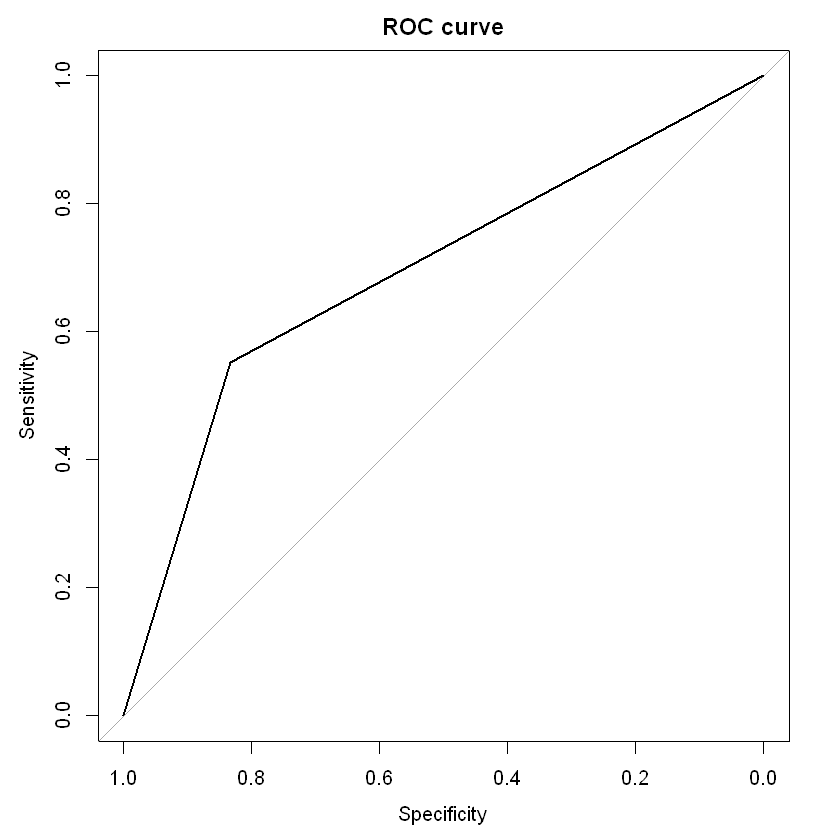

In [248]:
library(pROC)

# Develop ROC curve to determine the quality of fit

r<-roc(d.valid$X1.1,y_hat_round)

# Plot the ROC curve

plot(r,main="ROC curve")
r

In [251]:
# The area under the curve is 69%. This means that whenever a sample is chosen
# from the response group and another sample is chosen from the non-response 
# group, then the model will correctly classify both the samples 68% of the times.


acc <- c()
auc <- c()

for (i in 1:9) {
  y_hat_round <- as.integer(y_hat > i/10)
  t <- table(y_hat_round,d.valid$X1.1)
  acc <- cbind(acc,(t[1,1] + t[2,2]) / sum(t))
  r<-roc(d.valid$X1.1,y_hat_round)
  auc <- cbind(auc,r$auc)
}

acc
auc

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



0.57,0.6833333,0.7033333,0.7233333,0.7433333,0.7366667,0.73,0.72,0.6933333


0.6700368,0.7175245,0.7074142,0.7000613,0.6927083,0.6492034,0.6112132,0.5707721,0.5235907


# -------------------- Part 2 -----------------------------

# The loss of incorrectly classfying a "bad" customer is 5 times the loss of 
# incorrectly classifying a "good" customer. 
# Calulating loss for the value of 
# thresholds ranging from 0.01 to 1. 

# Approach for Part#2
1) for the confusion matrix,Associated cost to False Positives and True negatives (as TP and FN are Zero cost)
2) per requirement, use True negatives are 5 times more costlier than False positives. For values 1-100, calculate the loss
3) identify the threshold with lowest loss
4) For the minimum threshold point, obtain the Accuracy and AUC
## Accuracy : 0.57
## Area under the curve: 0.67

In [296]:
loss <- c()
#Associated cost to False Positives and True negatives (as TP and FN are Zero cost)
for(i in 1:100)
{
  y_hat_round <- as.integer(y_hat > (i/100)) # calculate threshold predictions

  tm <-as.matrix(table(y_hat_round,d.valid$X1.1)) #confusion matrix

  if(nrow(tm)>1) { c1 <- tm[2,1] } else { c1 <- 0 }
  if(ncol(tm)>1) { c2 <- tm[1,2] } else { c2 <- 0 }
  loss <- c(loss, c2*5 + c1)
}
loss#loss for 100 values(1-100)

[1] 212 207 192 183 182 182 171 162 175 171 173 169 169 170 167 173 172 178
 [19] 185 185 182 187 200 205 208 206 206 216 220 222 218 216 220 223 227 237
 [37] 241 250 270 268 282 280 280 288 297 297 297 297 307 306 306 311 310 314
 [55] 313 315 314 314 316 330 330 345 359 363 366 369 370 370 375 380 385 385
 [73] 395 405 405 405 405 414 419 428 438 438 448 453 468 468 473 478 482 482
 [91] 487 497 497 506 516 516 516 515 515 515

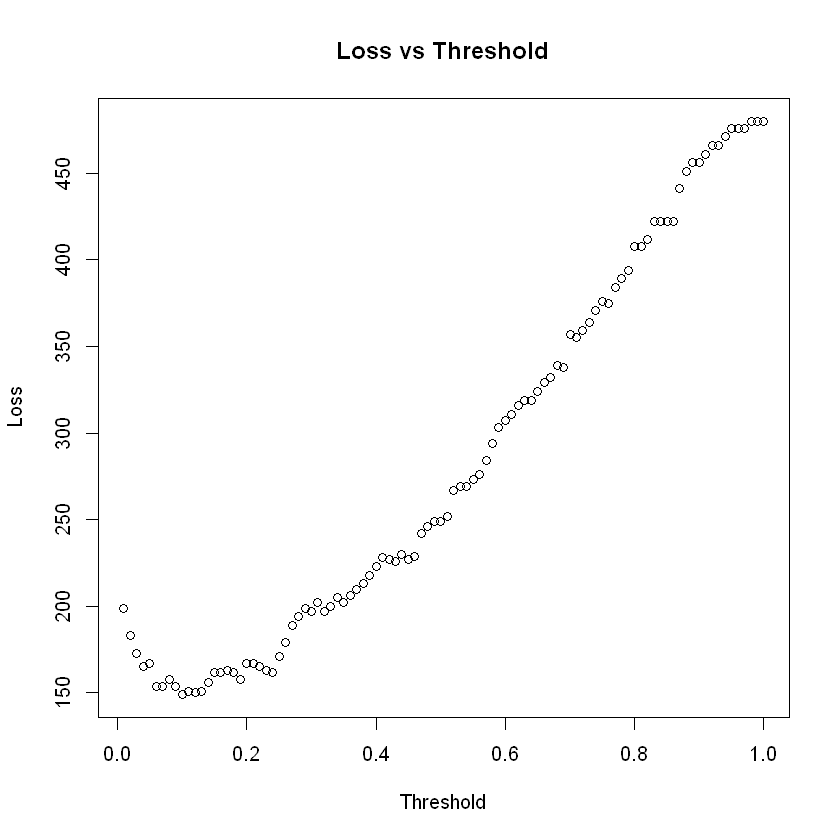

In [254]:
plot(c(1:100)/100,loss,xlab = "Threshold",ylab = "Loss",main = "Loss vs Threshold")

In [255]:
which.min(loss) # find the mininmuj loss

[1] 10

In [256]:
loss

[1] 199 183 173 165 167 154 154 158 154 149 151 150 151 156 162 162 163 162
 [19] 158 167 167 165 163 162 171 179 189 194 199 197 202 197 200 205 202 206
 [37] 210 213 218 223 228 227 226 230 227 229 242 246 249 249 252 267 269 269
 [55] 273 276 284 294 303 307 311 316 319 319 324 329 332 339 338 357 355 359
 [73] 364 371 376 375 384 389 394 408 408 412 422 422 422 422 441 451 456 456
 [91] 461 466 466 471 476 476 476 480 480 480

In [259]:
# The threshold probability corresponding to minimum expected loss is 0.14.  
# The range from 0.07-0.14 is all pretty good.


#Here's the accuracy and area-under-curve for the 0.14 threshold:

y_hat_round <- as.integer(y_hat > (which.min(loss)/100)) # find 0/1 predictions
t <- table(y_hat_round,d.valid$X1.1) # put in table form 
acc <- (t[1,1] + t[2,2]) / sum(t) # calculate accuracy
r<-roc(d.valid$X1.1,y_hat_round) # calculate ROC curve
auc <- r$auc # get AUC

acc
auc

## [1] 0.57
## Area under the curve: 0.67

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.57

Area under the curve: 0.67

In [ ]:
########End of Week 7 Advanced Regression assignment###########